In [53]:
#FileName: KickScrape_KLarson10292020.ipynb
#Author: Kyle Larson
#Purpose: To analyze the file 
#DSI_kickstarterscrape_dataset.csv
import pandas as pd
import csv
kickscrape_path ="DSI_kickstarterscrape_dataset.csv"
#kickdataframe = pd.read_csv(kickscrape_path, sep=",", encoding="utf8")
#d ={ 'Time':[] , data_source:[] }
i=0
with open(kickscrape_path, encoding='latin-1', mode='r') as csv_file:#encoding="utf8"
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if(i==0):
            cols = row
            df = pd.DataFrame(columns=[cols])
        df_length = len(df)
        df.loc[df_length] = row
        #if(i==500):
        #    break
        i=i+1
df.head()
          

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
1,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500,11545,1.09952381,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30
2,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000,20,0.005,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
3,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000,56,0.0028,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28
4,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000,6535,1.089166667,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22


In [90]:
df = df.drop(df.index[0])

In [97]:
df.describe()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
count,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957
unique,45815,45754,45814,14,51,4850,5,1837,10951,21977,974,41068,64,28379,84,315,5954
top,2141184596,Black Storm,http://www.kickstarter.com/projects/johnpaulka...,Film &amp; Video,Documentary,"Los Angeles, CA",successful,5000,0,0,0,"Sun, 01 Jan 2012 04:59:00 -0000",7,"$10,$25,$50,$100,$250,$500,$1,000",0,0,30
freq,2,3,2,13053,4012,3927,22969,4217,3944,3944,3945,44,5847,369,16040,23469,11113


In [127]:

import re
X = df[['pledged']]
sigma =0
arbetrary = 20#an arbetrary small number compared to 45957 to account for gap in data
for i in range(len(X)-arbetrary):
   if not re.search('\d+', X.iloc[i][0]):
       print(X.iloc[i][0])
   else: 
       sigma = sigma + float(X.iloc[i][0])
print(sigma)













228735822.0


In [128]:
# population mean
print(sigma/(len(X)-arbetrary))

4979.337396869626


In [134]:
Y = df[['backers']]
y = pd.DataFrame(columns=['backers'])
for i in range(1, len(Y)-20):
    if not re.search('\d+', Y.iloc[i][0]):
        print(Y.iloc[i][0])
    else:
        df_length = len(y)
        y.loc[df_length] =  float(Y.iloc[i][0])
y.head()

,backers
0,2.0
1,3.0
2,100.0
3,0.0
4,39.0


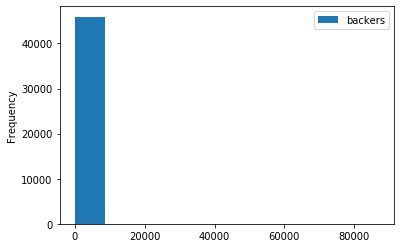

In [135]:
y.plot(kind='hist')

In [136]:
import dill
dill.dump_session('102920.db')

TypeError: can't pickle _csv.reader objects

In [ ]:
#dill.load_session('102920.db')